In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from utils import open_wipe_and_add
from read_sort import read_sort_main


FILES = {"data/ecoli_100Kb_reads_5x.fasta":"data/headerless/ecoli_100Kb_reads_5x.fasta.headerless.gz",
        "data/ecoli_100Kb_reads_10x.fasta":"data/headerless/ecoli_100Kb_reads_10x.fasta.headerless.gz",
        "data/ecoli_100Kb_reads_20x.fasta":"data/headerless/ecoli_100Kb_reads_20x.fasta.headerless.gz",
        "data/ecoli_100Kb_reads_40x.fasta":"data/headerless/ecoli_100Kb_reads_40x.fasta.headerless.gz",
        "data/ecoli_100Kb_reads_80x.fasta":"data/headerless/ecoli_100Kb_reads_80x.fasta.headerless.gz",
        "data/ecoli_100Kb_reads_120x.fasta":"data/headerless/ecoli_100Kb_reads_120x.fasta.headerless.gz",
        "data/clean_mix.fasta":"data/headerless/clean_mix_headerless.fasta.gz",
        "data/humch1_1Mb_reads_120x.fasta":"data/headerless/humch1_1Mb_reads_120x_headerless.fasta.gz"}
file_size = ["ecoli_5X","ecoli_10X","ecoli_20X","ecoli_40X","ecoli_80X","ecoli_120X","mix","HChr1_120X"]
KMER_SIZE = [2,3,4,5,6,7,8,9,10]


In [12]:
with open_wipe_and_add("all_log.csv") as out:
    for i,file in enumerate(FILES):
        for size in KMER_SIZE:
            kwargs = {"input" : file,
            "compare_to":FILES[file],
            "delete" : True,
            "method" : "kmer_sort",
            "size" : size}
            log = read_sort_main(**kwargs)
            line = ";".join([str(size),file_size[i],str(log["time"]),str(log["rate"])]) + "\n"
            print("size;file;time;rate")
            print(line)
            out.write(line)

Function 'sort_by_kmer' executed in 0.0220s
size;file;time;rate
2;ecoli_5X;0.022571563720703125;1.2332306711088359

Function 'sort_by_kmer' executed in 0.0218s
size;file;time;rate
3;ecoli_5X;0.021802186965942383;1.2907711091006508

Function 'sort_by_kmer' executed in 0.0371s
size;file;time;rate
4;ecoli_5X;0.03712868690490723;1.3503730794677644

Function 'sort_by_kmer' executed in 0.1294s
size;file;time;rate
5;ecoli_5X;0.12944912910461426;1.4697504625693854

Function 'sort_by_kmer' executed in 0.3695s
size;file;time;rate
6;ecoli_5X;0.369704008102417;1.4893231040528625

Function 'sort_by_kmer' executed in 0.8072s
size;file;time;rate
7;ecoli_5X;0.8073654174804688;1.3948232658794943

Function 'sort_by_kmer' executed in 0.9946s
size;file;time;rate
8;ecoli_5X;0.9946885108947754;1.2040590587309912

Function 'sort_by_kmer' executed in 1.0391s
size;file;time;rate
9;ecoli_5X;1.0392351150512695;1.144823664139978

Function 'sort_by_kmer' executed in 1.1031s
size;file;time;rate
10;ecoli_5X;1.103239

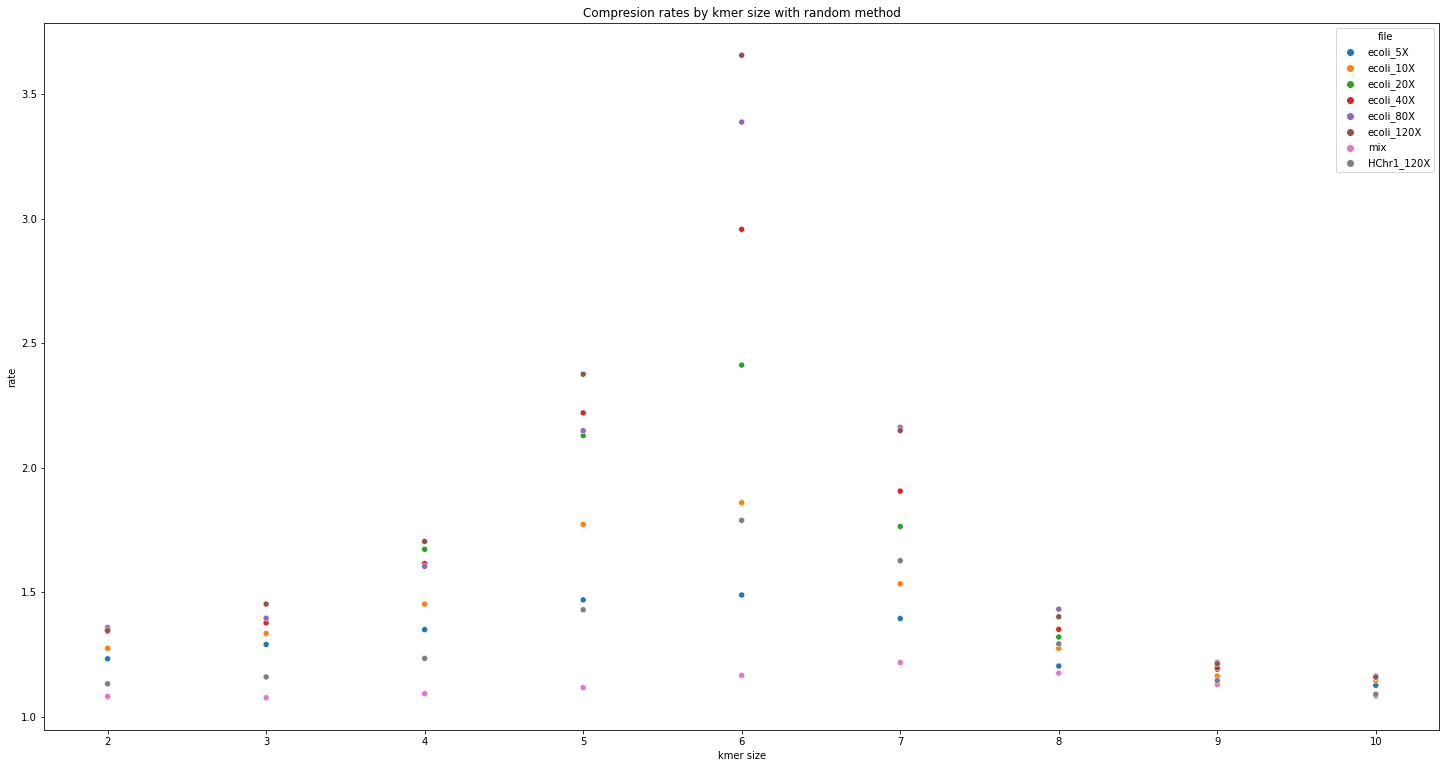

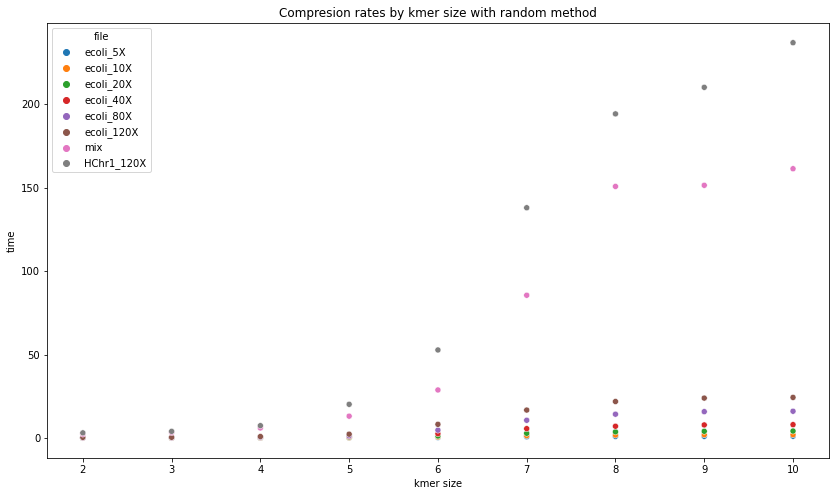

In [16]:
import pandas as pd

df = pd.DataFrame(pd.read_csv("all_log.csv",sep=";"))
df
plt.figure(figsize=(25,13))
one_two= sns.scatterplot(
    x="kmer size",y="rate",
    data=df,
    hue="file",
    legend="brief",
).set(title="time by kmer size with random method")

plt.figure(figsize=(14,8))
one_two= sns.scatterplot(
    x="kmer size",y="time",
    data=df,
    hue="file",
    legend="brief",
).set(title="Compresion rates by kmer size with random method")
            